In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
price_path = '/Users/feizhan/Dropbox/Project2M/ASXYearlyCompanyConsolidation/'

In [3]:
years = [2013, 2014, 2015, 2016]

In [4]:
dat = {}

In [5]:
for year in years:
    dat[year] = pd.read_csv(os.path.join(price_path, str(year)+'price.csv'))

In [6]:
dates = pd.date_range('2016-01-01', '2016-12-31')
date_str = []
for date in dates:
    date_str.append('{:02d}-{:02d}'.format(date.month, date.day))

In [7]:
com = {}

In [8]:
code = '3PL'

In [9]:
for year in years:
    com[year] = dat[year].loc[(dat[year].loc[:, 'code'] == code+'.AX').values].copy()
    com[year].loc[:, 'Date'] = com[year].loc[:, 'Date'].str[5:]
    com[year] = com[year].set_index('Date')
    com[year] = com[year].reindex(index=date_str)
    com[year] = com[year].loc[:, 'Close']
    com[year].name = year

In [10]:
price = pd.concat([value for key, value in com.items()], axis=1)

In [11]:
price.head()

,2016,2013,2014,2015
Date,,,,
01-01,2.01,NaN,NaN,2.17
01-02,NaN,NaN,NaN,2.26
01-03,NaN,NaN,NaN,NaN
01-04,2.02,NaN,NaN,NaN
01-05,1.98,NaN,NaN,2.07


In [12]:
price = price.fillna(method='ffill')

In [13]:
today = '{:02d}-{:02d}'.format(pd.datetime.now().month, pd.datetime.now().day)

In [15]:
price.loc[today:'12-31', years[-1]] = np.nan

In [16]:
div_path = '/Users/feizhan/Dropbox/Project2M/ASXDividendHistory/'
div_dat = pd.read_csv(os.path.join(div_path, code+'.AX.csv'))
div_dat.iloc[:, 0] = pd.to_datetime(div_dat.iloc[:, 0])
div_dat = div_dat.set_index(div_dat.columns[0])
div_dat = div_dat.sort_index()
div_dat = div_dat.loc[str(years[0])+'-01-01':str(years[-1])+'-12-31']
div_dates = div_dat.index.tolist()

In [17]:
xticks = []
for month in range(1, 13):
    xticks.append('{:02d}-01'.format(month))

In [18]:
xlocs = []
for date in xticks:
    xlocs.append(date_str.index(date))

In [19]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(years)))

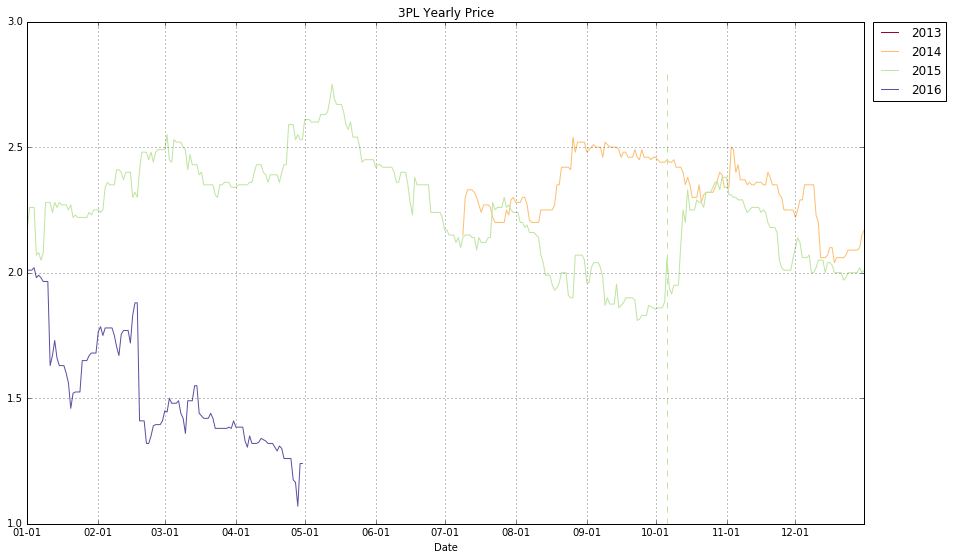

In [20]:
plt.figure(figsize=(15, 9))
ax = None
for year_ind, year in enumerate(years):
    if ax:
        price.loc[:, year].plot(label=year, color=colors[year_ind], ax=ax)
    else:
        ax = price.loc[:, year].plot(label=year, color=colors[year_ind])
if len(div_dates) > 0:
    for div_date in div_dates:
        x = [date_str.index('{:02d}-{:02d}'.format(div_date.month, div_date.day))] * 2
        y = ax.get_ylim()
        ax.plot(x, y, color=colors[years.index(div_date.year)], linestyle='--')
plt.title(code + ' Yearly Price')
plt.xticks(xlocs, xticks)
plt.grid()
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.savefig(code+'yearlyPrice.png')

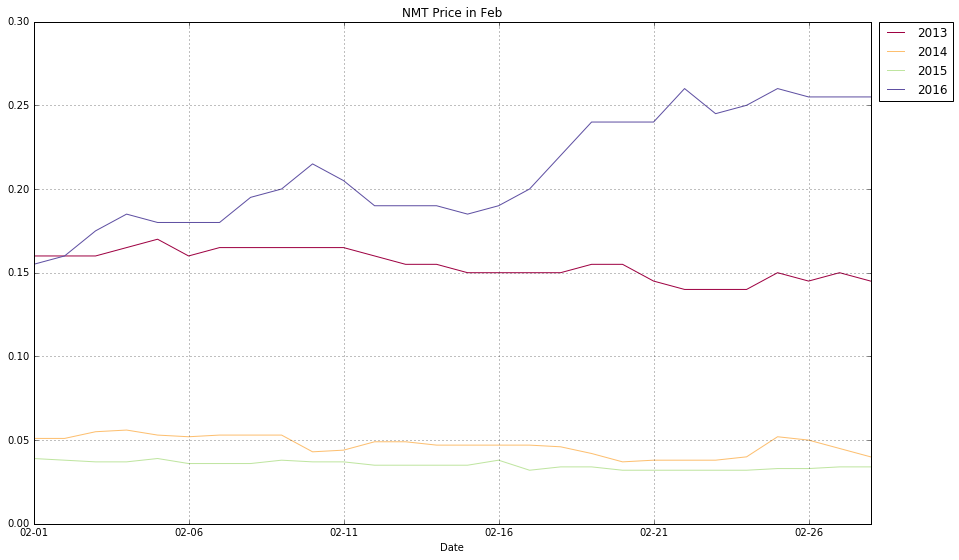

In [18]:
start = '02-01'
end = '02-28'
plt.figure(figsize=(15, 9))
ax = None
for year_ind, year in enumerate(years):
    if ax:
        price.loc[start:end, year].plot(label=year, color=colors[year_ind], ax=ax)
    else:
        ax = price.loc[start:end, year].plot(label=year, color=colors[year_ind])
plt.title(code + ' Price in Feb')
plt.grid()
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.savefig(code+'PriceInFeb.png')